In [697]:
import pandas as pd #data manipulation transformation
import numpy as np  #numerical data analysis
df = pd.read_excel (r'C:\Users\Hp\Downloads\Week1_challenge_data_source.xlsx')
print (df)
import matplotlib.pyplot as plt
import seaborn as sns    # data visualization
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #higher resolution
# importing the style package
from matplotlib import style
# using the style for the plot
plt.style.use('ggplot')
import sqlite3
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import kmeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


                   Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18     770.0   
1       13114483482878900224 2019-04-09 13:04:04     235.0   
2       13114483484080500736 2019-04-09 17:42:11       1.0   
3       13114483485442799616 2019-04-10 00:31:25     486.0   
4       13114483499480700928 2019-04-12 20:10:23     565.0   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42     451.0   
149997   7349883264234609664 2019-04-29 07:28:42     483.0   
149998  13114483573367300096 2019-04-29 07:28:43     283.0   
149999  13114483573367300096 2019-04-29 07:28:43     696.0   
150000                                       NaT       NaN   

                       End  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0      2019-04-25 14:35:31   662.0  1823652.0  2.082014e+14   3.366496e+10   
1      2019-04-25 08:15:48   606.0  1365104.0  2.082019e+14   3.368185e+10   
2      2019-04-25 11:

ImportError: cannot import name 'kmeans' from 'sklearn.cluster' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

In [ ]:
df.shape

In [ ]:
df.columns.tolist()

In [ ]:
#relevant variables and associated data types

df.dtypes

# Handling Missing Value


In [ ]:
# missing values in the dataset?
def percent_missing(dm):

    # Calculate total number of cells in dataframe
    totalCells = np.product(dm.shape)

    # Count number of missing values per column
    missingCount = dm.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

In [ ]:
# Now which column(s) has missing values
df.isna().sum()


In [ ]:
# drop columns with more than 30% missing values
perc = 30.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count)

#print modified data

mod_df.isna().sum().sort_values(ascending=False)/len(df)*100 
#print(min_count)
#print(data.shape, mod_df.shape)

#print( type (mod_df))

In [ ]:
#the colums that have no 30% missing vakues 
df.isna().sum()


In [ ]:
# cleaning data frame
mod_df.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)
cols=['Avg RTT DL (ms)','Avg RTT UL (ms)','Last Location Name','10 Kbps < UL TP < 50 Kbps (%)','Nb of sec with Vol UL < 1250B','50 Kbps < UL TP < 300 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','UL TP < 10 Kbps (%)',
      'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','DL TP > 1 Mbps (%)','250 Kbps < DL TP < 1 Mbps (%)','50 Kbps < DL TP < 250 Kbps (%)','DL TP < 50 Kbps (%)']
for col in cols:
  mod_df[col]=mod_df[col].fillna(method='ffill')

mod_df.isna().sum().sort_values(ascending=False)/len(df)*100

#data.isna().sum().sort_values(ascending=False)/len(data)*100
#print (type(data))

In [ ]:
df

In [ ]:
df.shape


In [ ]:
#Transforming Data Scaling and Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

In [ ]:
original_data[0].min(), original_data[0].max()


In [ ]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

In [ ]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

In [ ]:

from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [ ]:
df.info()

In [ ]:
#For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance:
#● Start by identifying the top 10 handsets used by the customers.
#● Then, identify the top 3 handset manufacturers
#● Next, identify the top 5 handsets per top 3 handset manufacturer
#● Make a short interpretation and recommendation to marketing teams

In [ ]:
#Start by identifying the top 10 handsets used by the customers.
df["Handset Type"].value_counts().head(10)

In [ ]:
#identify the top 3 handset manufacturers
df["Handset Manufacturer"].value_counts().head(3)

In [ ]:
apple_handsets = df[df["Handset Manufacturer"] == "Samsung"]
apple_handsets["Handset Type"].value_counts().head(5)

In [ ]:
apple_handsets = df[df["Handset Manufacturer"] == "Huawei"]
apple_handsets["Handset Type"].value_counts().head(5)

In [ ]:
#● Make a short interpretation and recommendation to marketing tea\
# the marketing team has to make full attention on cleaning above handests

In [ ]:
#Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.
#● Aggregate per user the following information in the column
#○ number of xDR sessions
#○ Session duration
#○ the total download (DL) and upload (UL) data
#○ the total data volume (in Bytes) during this session for each application

In [ ]:
sessions = df[["MSISDN/Number","Bearer Id"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

In [ ]:
session_count.describe()

In [ ]:
df_usage = df[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
df_usage.groupby(["MSISDN/Number"]).agg('sum')

In [707]:
df["Total Google"] = df["Google DL (Bytes)"] + df["Google UL (Bytes)"]
df["Total Youtube"] = df["Youtube DL (Bytes)"] + df["Youtube UL (Bytes)"]
df["Total Netflix"] = df["Netflix DL (Bytes)"] + df["Netflix UL (Bytes)"]
df["Total Email"] = df["Email DL (Bytes)"] + df["Email UL (Bytes)"]
df["Total Gaming"] = df["Gaming DL (Bytes)"] + df["Gaming UL (Bytes)"]
df["Total Social Media"] = df["Social Media DL (Bytes)"] + df["Social Media UL (Bytes)"]
df["Total Other"] = df["Other DL (Bytes)"] + df["Other UL (Bytes)"]


app_df = df[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", 
                 "Total Social Media", "Total Other"]]
app_df.groupby(["MSISDN/Number"]).agg('sum')

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other
MSISDN/Number,,,,,,,
3.360100e+10,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0


In [ ]:
#Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights.
#Ensure that you identify and treat all missing values and outliers in the dataset by replacing by 
#the mean of the corresponding column.

In [ ]:
#checking for null values
df[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].isna().sum().head(60)

In [ ]:
#filling the null values with the mean of the column
df["Total DL (Bytes)"].fillna(df["Total DL (Bytes)"].mean(), inplace = True)
df["Total UL (Bytes)"].fillna(df["Total UL (Bytes)"].mean(), inplace = True)
df["Dur. (ms).1"].fillna(df["Dur. (ms).1"].mean(), inplace = True)

In [ ]:
df[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].describe()

In [ ]:
#checking for skewness
df.skew()

In [ ]:
#looking for the outliers
df.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])

In [ ]:
#plotting variable distributions
df["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")

In [ ]:
#ploting Histogram for Total Download 

df["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

In [ ]:
#ploting Histogram Total Upload 
df["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")

In [ ]:
#plotting Histogram for Total Social Media Data
df["Total Social Media"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")

In [ ]:
# plotting Histogram for Total Google Data
df["Total Google"].hist(bins = 50)
plt.title("Total Google Data Histogram")

In [ ]:
#plotting Histogram  for Total Email Data
df["Total Email"].hist(bins = 50)
plt.title("Total Email Data Histogram")

In [ ]:
#plotting Histogram for Total Youtube Data 
df["Total Youtube"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")


In [ ]:
#plotting Histogram for Total Netflix
df["Total Netflix"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")

In [ ]:
#plotting Histogram for Total Gaming Data
df["Total Gaming"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")

In [ ]:
#plotting comparisons
total_usage = app_df[["Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")

In [ ]:
df.plot.line()
#eroor

#Variable transformations
segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

In [ ]:
#group users into top 5 deciles 
users = df
.groupby(["MSISDN/Number"]).agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total UL (Bytes)':'sum', 'Total DL (Bytes)':'sum'}).sort_values(by="Dur. (ms).1", ascending = False)
first_decile = users.iloc[0:10,:]
second_decile = users.iloc[10:20,:]
third_decile = users.iloc[20:30,:]
fourth_decile = users.iloc[30:40,:]
fifth_decile = users.iloc[40:50,:]

#print total data of each decile group
print("Total data of the first decile is: ",first_decile["Total DL (Bytes)"].sum() + first_decile["Total UL (Bytes)"].sum())
print("Total data of the second decile is: ",second_decile["Total DL (Bytes)"].sum() + second_decile["Total UL (Bytes)"].sum())
print("Total data of the third decile is: ",third_decile["Total DL (Bytes)"].sum() + third_decile["Total UL (Bytes)"].sum())
print("Total data of the fourth decile is: ",fourth_decile["Total DL (Bytes)"].sum() + fourth_decile["Total UL (Bytes)"].sum())
print("Total data of the fifth decile is: ",fifth_decile["Total DL (Bytes)"].sum() + fifth_decile["Total UL (Bytes)"].sum())

#Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email,data, Youtube data, Netflix data, Gaming data, Other data

In [ ]:
#correlation/Relationship of the variables /Applications)
correlation = total_usage.corr()
sns.heatmap(correlation, annot=True)
plt.show()

#Dimensionality Reduction
perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum)

In [ ]:
#use PCA to get 4 principal components

pca = PCA(n_components=4)
principal_components = pca.fit_transform(total_usage)
principal_Df = pd.DataFrame(data = principal_components
             , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4'])
principal_Df

#Task 2 - User Engagement analysis.
engagement metrics:

● sessions frequency.
● the duration of the session.
● the sessions total traffic (download and upload (bytes))
Task 2.1 - Based on the above:

Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [ ]:
#adding total traffic to the data
df["Total Traffic"] = df["Total UL (Bytes)"] + df["Total DL (Bytes)"]
engagement = df.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total Traffic':'sum'})


print("Top ten frequent users: \n", engagement.sort_values(by="Bearer Id", ascending=False).head(10))
print("\n\nTop ten users with the longest sessions: \n", engagement.sort_values(by="Dur. (ms).1", ascending=False).head(10))
print("\n\nTop ten users with the most data usage: \n", engagement.sort_values(by="Total Traffic", ascending=False).head(10))

In [ ]:
engagement.describe()


#Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement

In [ ]:
# normalizing the engagement dataframe
norm_engagement = (engagement - engagement.mean())/engagement.std()
norm_engagement.describe()

In [ ]:
#checking the normalized variables
norm_engagement["Bearer Id"].hist(bins=50)

In [ ]:
norm_engagement["Dur. (ms).1"].hist(bins=50)


In [ ]:
norm_engagement["Total Traffic"].hist(bins=50)

In [698]:
#perform kmeans clustering with k=3
kmeans_3k = KMeans(n_clusters = 3)
kmeans_3k.fit(norm_engagement)

KMeans(n_clusters=3)

In [699]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3, n_jobs=None, precompute_distances='auto')

In [701]:
#plotting clusters  ()
sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=norm_engagement["n_clusters"], legend="full")

KeyError: 'n_clusters'

In [702]:
engagement["cluster_3k"]=cluster_3k
sns.scatterplot(x=engagement["Dur. (ms).1"], y=engagement["Total Traffic"], hue=engagement["cluster_3k"], legend="full")


NameError: name 'cluster_3k' is not defined

In [ ]:
#number of users in each cluster
print("C.   Total Users")
engagement["cluster_3k"].value_counts()

In [703]:
engagement[engagement.cluster_3k == 0].describe()


AttributeError: 'DataFrame' object has no attribute 'cluster_3k'

In [709]:
app_total = df.groupby('MSISDN/Number').agg({ 'Total Other':'sum',"Total Google":'sum', "Total Youtube":'sum', "Total Netflix":'sum', "Total Email":'sum', "Total Gaming":'sum', "Total Social Media":'sum', "Total Other":'sum'})


for coll in app_total:
    print("\n\nTop ten ",coll," users: \n", app_total.sort_values(by=coll, ascending=False)[coll].head(10))



Top ten  Total Other  users: 
 MSISDN/Number
3.362632e+10    8.167878e+09
3.361489e+10    7.639264e+09
3.367588e+10    6.798515e+09
3.362578e+10    6.354583e+09
3.360313e+10    6.326671e+09
3.365973e+10    6.317415e+09
3.362695e+10    5.305448e+09
3.362708e+10    5.117791e+09
3.376127e+10    5.077779e+09
3.365836e+10    5.013651e+09
Name: Total Other, dtype: float64


Top ten  Total Google  users: 
 MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
Name: Total Google, dtype: float64


Top ten  Total Youtube  users: 
 MSISDN/Number
3.362578e+10    452958769.0
3.376054e+10    396289198.0
3.361489e+10    394370218.0
3.362632e+10    374483047.0
3.367588e+10    317410572.0
3.366716e+10    315231310.0
3.362708e+10    308790774.0
3.376041e+10    30316

In [710]:
#print top 3 used apps
top_used = pd.DataFrame(columns=["Name", "Total Data"])
for col in app_total:
    top_used.loc[len(top_used)] = [col, app_total[col].sum()]

top_three = top_used.sort_values(by = "Total Data", ascending = False)[1:4]
print("Top three used applications: ")
top_three

Top three used applications: 


,Name,Total Data
0,Total Other,6.395425e+13
2,Total Youtube,3.372204e+12
3,Total Netflix,3.370060e+12


Text(0.5, 1.0, 'Top 3 most used apps')

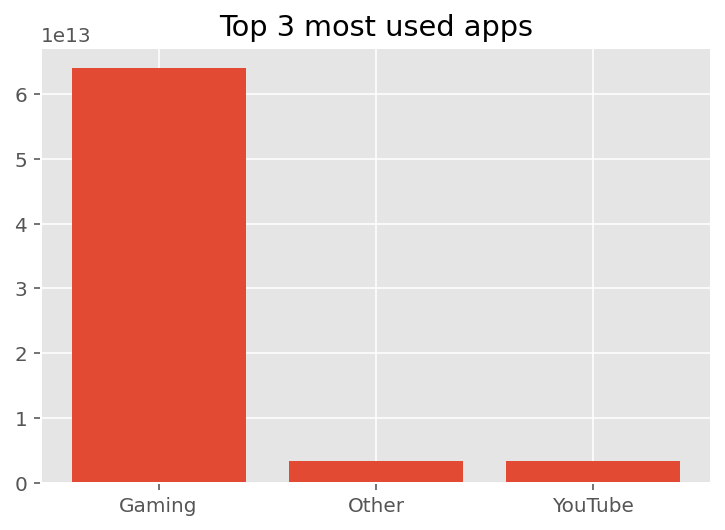

In [711]:
#plot the top 3 apps
ind = np.arange(3)
width =0.8

plt.xticks(ind , ("Gaming", "Other", "YouTube"))
plt.bar(ind, top_three["Total Data"], width, label = "Total Usage")
plt.title("Top 3 most used apps")

In [712]:
#calculating inertia for k values 1 -19
inertia = []
for cluster in range(1,20):
    km = KMeans(n_jobs = -1, n_clusters = cluster)
    km.fit(norm_engagement)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

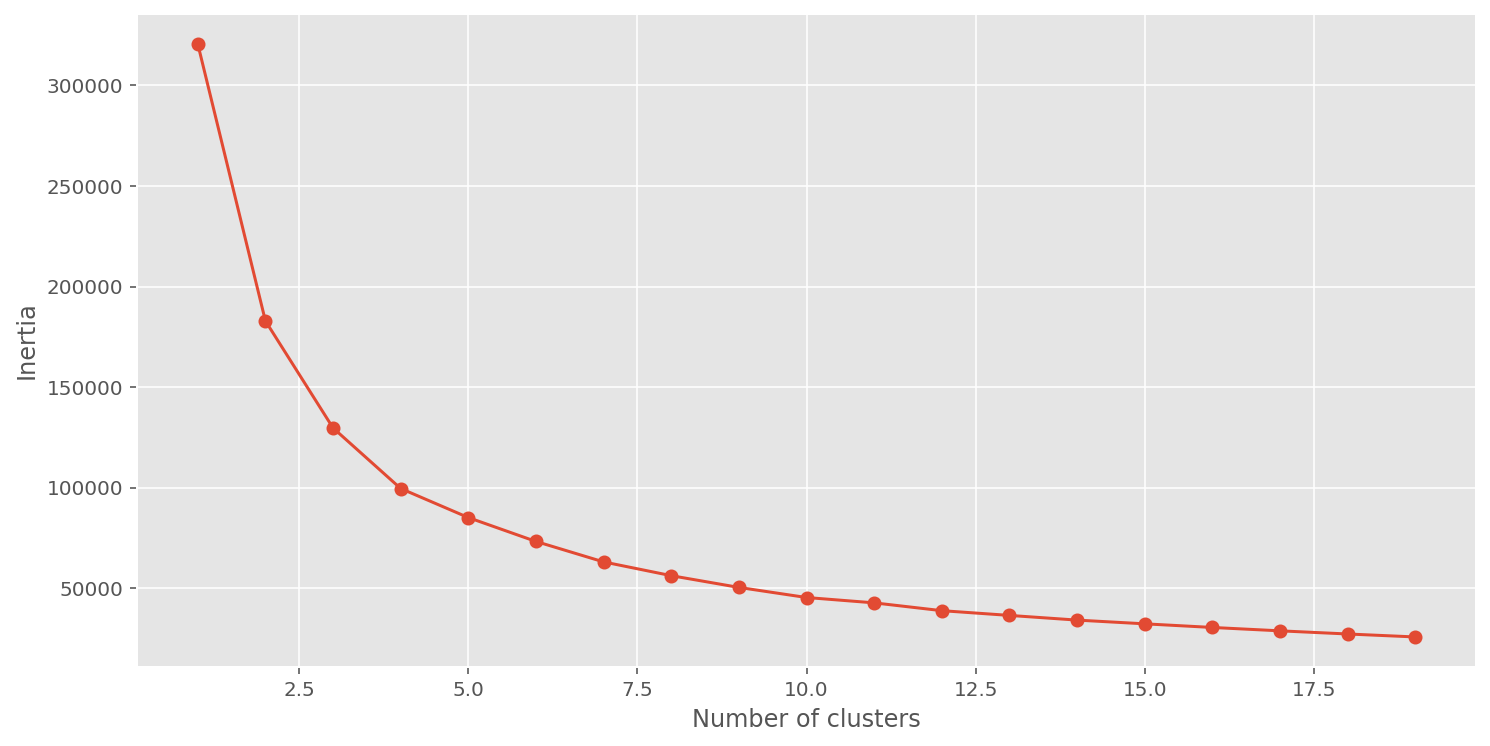

In [713]:
#plotting k Vs inertia 
frame = pd.DataFrame({'k':range(1,20), 'inertia':inertia})

plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<AxesSubplot:xlabel='Bearer Id', ylabel='Dur. (ms).1'>

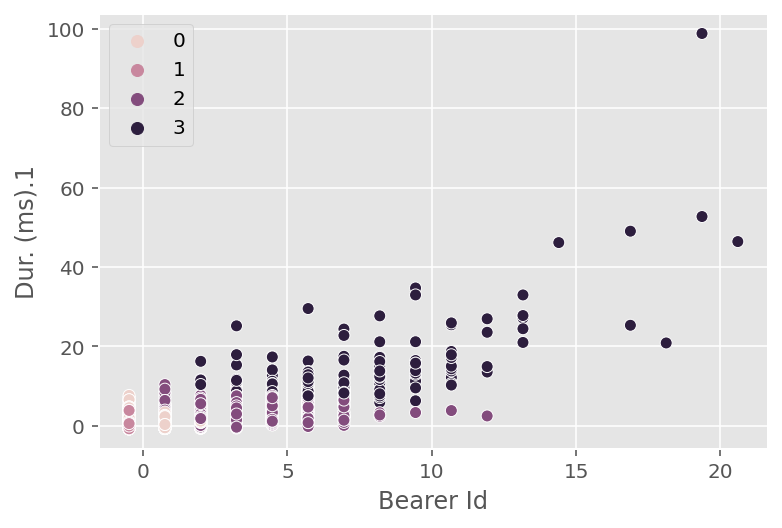

In [714]:
#taking k = 4 and clustering
kmeans_4k = KMeans(n_clusters=4)
kmeans_4k.fit(norm_engagement)

sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=kmeans_4k.labels_, legend="full")

#Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
● Average TCP retransmission
● Average RTT
● Handset type

In [720]:
#adding total network parameters
df["Total RTT"] = df["Avg RTT DL (ms)"] + df["Avg RTT UL (ms)"]
df["Total TP"] = df["Avg Bearer TP DL (kbps)"] + df["Avg Bearer TP UL (kbps)"]
df["Total TCP"] = df["TCP DL Retrans. Vol (Bytes)"] + df["TCP UL Retrans. Vol (Bytes)"]
experience = df.groupby('MSISDN/Number').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum', 'Handset Type':'count'})#

#Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
a. TCP values in the dataset.
b. RTT values in the dataset.
c. Throughput values in the dataset.

In [721]:
print("\n\nTop ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=False).head(10))
print("\n\nTop ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=False).head(10))
print("\n\nTop ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=False).head(10))



Top ten TCP values: 
                   Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                                 
3.366773e+10   8.354209e+09      703.0  379713.0             5
3.365908e+10   7.941860e+09      396.0  210259.0             3
3.376128e+10   6.043978e+09      351.0  144570.0             2
3.376264e+10   5.879989e+09     2860.0  549661.0             5
3.365066e+10   5.593366e+09     1543.0  259548.0             5
3.366318e+10   5.566929e+09      583.0  127603.0             4
3.376357e+10   5.179459e+09      479.0  120288.0             2
3.366905e+10   5.174215e+09      321.0  142042.0             4
3.365864e+10   5.165857e+09      171.0  105875.0             2
3.376386e+10   5.095685e+09     1184.0  312289.0             6


Top ten RTT values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
3.366232e+10         0.0    96924.0       3.0             1
3.366087e+10    

In [722]:
print("\n\nBottom ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=True).head(10))
print("\n\nBottom ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=True).head(10))
print("\n\nBottom ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=True).head(10))



Bottom ten TCP values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
3.360100e+10         0.0       46.0      76.0             1
3.366674e+10         0.0       81.0     188.0             2
3.366674e+10         0.0      122.0     157.0             2
3.366674e+10         0.0        0.0      79.0             1
3.366674e+10         0.0       40.0      42.0             1
3.366674e+10         0.0       58.0   17890.0             1
3.366674e+10         0.0       33.0      54.0             1
3.366674e+10         0.0        0.0      99.0             1
3.366674e+10         0.0      114.0     816.0             1
3.366674e+10         0.0       28.0      84.0             1


Bottom ten RTT values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
8.823971e+14         0.0        0.0       2.0             1
3.367752e+10         0.0        0.0     161.0 

In [723]:
top10_tcp = experience.groupby('Total TCP').size().sort_values(ascending = False).head(10)
top10_tcp

top10_rtt = experience.groupby('Total RTT').size().sort_values(ascending = False).head(10)
top10_rtt

top10_tp = experience.groupby('Total TP').size().sort_values(ascending = False).head(10)
top10_tp


print("\n\nTen most frequent TCP values: \n", top10_tcp)
print("\n\nTen most frequent RTT values: \n", top10_rtt)
print("\n\nTen most frequent Throughput values: \n", top10_tp)



Ten most frequent TCP values: 
 Total TCP
0.0        67565
2660.0        21
5320.0        21
6650.0        18
3990.0        17
7980.0        13
1873.0         9
11970.0        8
2648.0         8
10640.0        7
dtype: int64


Ten most frequent RTT values: 
 Total RTT
0.0     18546
29.0     2778
39.0     2245
38.0     1541
30.0     1478
40.0     1466
28.0     1373
49.0     1268
31.0     1096
41.0     1095
dtype: int64


Ten most frequent Throughput values: 
 Total TP
15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
dtype: int64


#Task 3.3 - Compute & report

The distribution of the average throughput per handset type and provide interpretation for your findings. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [725]:
handset = df.groupby('Handset Type').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum'})

print("\n\nThroughput\n",handset.sort_values(by="Total TP", ascending = False).head(10))
print("\n\nTCP Retransmission\n",handset.sort_values(by="Total TCP", ascending = False).head(10))




Throughput
                                  Total TCP  Total RTT     Total TP
Handset Type                                                      
Huawei B528S-23A              1.042623e+12  2984690.0  833510472.0
undefined                     7.873569e+09   550453.0   90414733.0
Apple iPhone 7 (A1778)        8.214772e+09   699835.0   77183403.0
Apple iPhone 6S (A1688)       1.112880e+10   725131.0   74298231.0
Apple iPhone 6 (A1586)        1.022702e+10   902390.0   68735008.0
Huawei E5180                  6.022787e+10   342228.0   64368628.0
Samsung Galaxy S8 (Sm-G950F)  6.445683e+09   231572.0   63224397.0
Apple iPhone Xr (A2105)       8.891681e+09   304898.0   62436108.0
Apple iPhone 8 (A1905)        5.501643e+09   504114.0   58106552.0
Apple iPhone X (A1901)        7.856175e+09   330971.0   57047497.0


TCP Retransmission
                             Total TCP  Total RTT     Total TP
Handset Type                                                 
Huawei B528S-23A         1.042623e+1

#Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [726]:
#normalizing the experience dataframe
norm_experience = (experience - experience.mean())/experience.std()
norm_experience

,Total TCP,Total RTT,Total TP,Handset Type
MSISDN/Number,,,,
3.360100e+10,-0.079607,-0.144258,-0.492745,-0.488562
3.360100e+10,-0.079607,-0.166714,-0.492203,-0.488562
3.360100e+10,-0.079607,-0.213125,-0.492250,-0.488562
3.360101e+10,-0.079607,-0.087367,-0.488692,-0.488562
3.360101e+10,-0.017705,-0.034968,0.844978,0.752099
...,...,...,...,...
3.379000e+10,-0.078167,-0.135275,-0.250287,-0.488562
3.379000e+10,-0.079607,-0.153240,-0.491802,-0.488562
3.197021e+12,-0.079607,-0.213125,-0.494512,-0.488562


In [732]:
#performing kmeans with k=3
kmeans_exp = KMeans(n_clusters=3)
kmeans_exp.fit(norm_experience)
cluster_exp = kmeans_exp.predict(norm_experience)
experience_centroids = kmeans_exp.cluster_centers_

In [731]:
#assign the clusters
norm_experience['cluster_exp'] = cluster_exp
norm_experience['cluster_exp'].value_counts()

0    97296
2     9333
1      227
Name: cluster_exp, dtype: int64

<AxesSubplot:xlabel='Total TP', ylabel='Total TCP'>

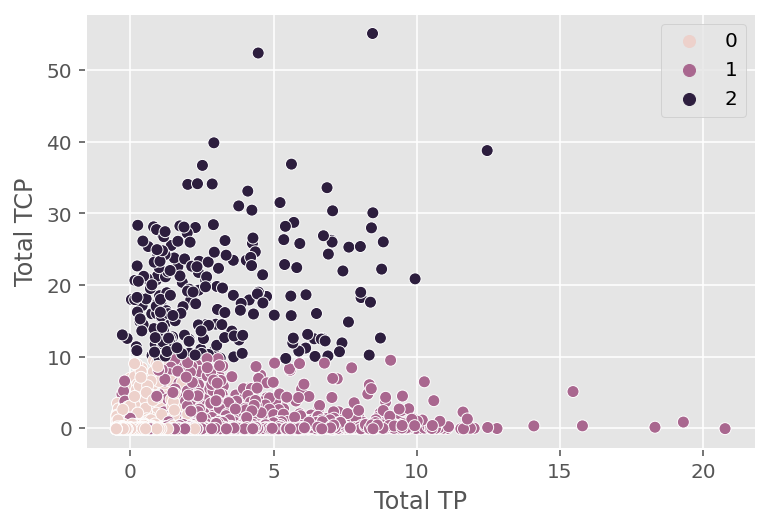

In [733]:
#plot the clusters
sns.scatterplot(x=norm_experience.iloc[:,2], y=norm_experience.iloc[:,0], hue=kmeans_exp.labels_, legend="full")

#ask 4

Task 4. 1 - Write a python program to assign:

a. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) - (jupyter notebook ) from scipy.spatial import distance

b. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [734]:
#compute each cluster mean to find the worst experienced cluster
print(norm_experience[norm_experience["cluster_exp"]==0].mean())
print(norm_experience[norm_experience["cluster_exp"]==1].mean())
print(norm_experience[norm_experience["cluster_exp"]==2].mean())

Total TCP      -0.059193
Total RTT      -0.041617
Total TP       -0.213682
Handset Type   -0.210403
cluster_exp     0.000000
dtype: float64
Total TCP       19.240803
Total RTT        0.337768
Total TP         3.038913
Handset Type     1.265853
cluster_exp      1.000000
dtype: float64
Total TCP       0.149103
Total RTT       0.425644
Total TP        2.153706
Handset Type    2.162648
cluster_exp     2.000000
dtype: float64
